In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, GridSearchCV #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [17]:

from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 

from collections import Counter

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [ ]:
train_stage.info()

In [ ]:
test_stage.info()

In [3]:
train = train.set_index('id')
test_pid=test.pop('id')

In [5]:
train_stage = train.copy()
test_stage = test.copy()

In [6]:
test_stage.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
5,Female,66.0,1,0,Yes,Private,Urban,219.98,32.2,never smoked
6,Female,49.0,0,0,Yes,Self-employed,Rural,74.03,25.1,NaN
7,Male,46.0,0,0,Yes,Govt_job,Urban,120.80,32.5,never smoked
8,Female,75.0,0,0,Yes,Self-employed,Rural,78.71,28.0,never smoked
9,Male,75.0,0,0,Yes,Self-employed,Urban,77.20,25.7,smokes


In [7]:
combine = [train_stage, test_stage]

In [16]:
train_stage.describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_cat
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,0.093571,0.047512,0.643733,2.535138,0.501290,104.482750,28.605038,0.475046,0.018041,4.053295
std,0.492151,0.291235,0.212733,0.478901,1.165635,0.500004,43.111751,7.770020,0.742823,0.133103,2.755085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.200000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.580000,27.700000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.900000,1.000000,0.000000,6.000000
max,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000,9.000000


In [ ]:
test_stage.describe()

In [ ]:
train_stage.groupby(['stroke','Residence_type'])['gender'].count()

In [8]:
train_stage['age_Range']=pd.qcut(train_stage['age'],9)
train_stage.groupby(['age_Range'])['stroke'].mean().to_frame().style.background_gradient(cmap='summer_r')

,stroke
age_Range,
"(0.079, 11.0]",0.000202922
"(11.0, 22.0]",0.00039116
"(22.0, 31.0]",0.000208899
"(31.0, 40.0]",0.0042605
"(40.0, 47.0]",0.0067766
"(47.0, 54.0]",0.0128311
"(54.0, 62.0]",0.0220342
"(62.0, 72.0]",0.0392279
"(72.0, 82.0]",0.0814187


In [9]:
for dataset in combine:
    dataset['age_cat']=0
    #train_stage.loc[train_stage['GrossIncome']<=3650,'GrossIncome_cat']=0
    dataset.loc[(dataset['age']>11)&(dataset['age']<=22),'age_cat']=1
    dataset.loc[(dataset['age']>22)&(dataset['age']<=31),'age_cat']=2
    dataset.loc[(dataset['age']>31)&(dataset['age']<=40),'age_cat']=3
    dataset.loc[(dataset['age']>40)&(dataset['age']<=47),'age_cat']=4
    dataset.loc[(dataset['age']>47)&(dataset['age']<=54),'age_cat']=5
    dataset.loc[(dataset['age']>54)&(dataset['age']<=62),'age_cat']=6
    dataset.loc[(dataset['age']>62)&(dataset['age']<=72),'age_cat']=7
    dataset.loc[(dataset['age']>72),'age_cat']=9

train_stage = train_stage.drop(['age_Range','age'], axis=1)
test_stage = test_stage.drop(['age'], axis=1)

In [10]:
train_stage['smoking_status'].fillna('never smoked',inplace = True)
test_stage['smoking_status'].fillna('never smoked',inplace = True)

In [25]:
train_stage['bmi'].fillna(train_stage['bmi'].mean(),inplace = True)
test_stage['bmi'].fillna(train_stage['bmi'].mean(),inplace = True)

In [11]:
cat_var=train_stage.select_dtypes(include = ['object']).columns
for var in cat_var :
    if(var not in ['stroke']):
        print(var)
        print(train_stage[var].unique())
        print(test_stage[var].unique())

gender
['Male' 'Female' 'Other']
['Male' 'Female' 'Other']
ever_married
['No' 'Yes']
['Yes' 'No']
work_type
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Residence_type
['Rural' 'Urban']
['Urban' 'Rural']
smoking_status
['never smoked' 'formerly smoked' 'smokes']
['formerly smoked' 'never smoked' 'smokes']


In [14]:
train_stage['gender'].replace(['Male','Female', 'Other'],[1,0,2],inplace=True)
train_stage['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
train_stage['work_type'].replace(['children','Never_worked','Self-employed','Private', 'Govt_job'],[0,1,2,3,4],inplace=True)
train_stage['Residence_type'].replace(['Rural','Urban'],[0,1],inplace=True)
train_stage['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,1,2],inplace=True)
    

In [48]:
test_stage['gender'].replace(['Male','Female', 'Other'],[1,0,2],inplace=True)
test_stage['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
test_stage['work_type'].replace(['children','Never_worked','Self-employed','Private', 'Govt_job'],[0,1,2,3,4],inplace=True)
test_stage['Residence_type'].replace(['Rural','Urban'],[0,1],inplace=True)
test_stage['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,1,2],inplace=True)
    

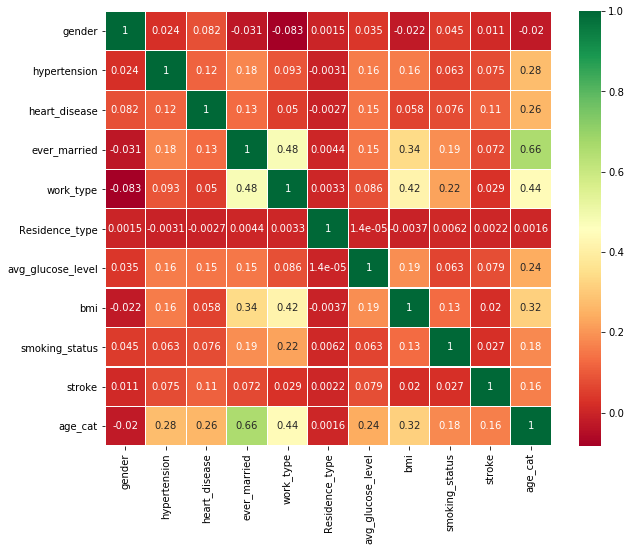

In [15]:
sns.heatmap(train_stage.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [26]:
y=train_stage['stroke']
X = train_stage.drop('stroke', axis=1)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 30669 to 36271
Data columns (total 10 columns):
gender               43400 non-null int64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null int64
work_type            43400 non-null int64
Residence_type       43400 non-null int64
avg_glucose_level    43400 non-null float64
bmi                  43400 non-null float64
smoking_status       43400 non-null int64
age_cat              43400 non-null int64
dtypes: float64(2), int64(8)
memory usage: 3.6 MB


In [28]:
sm = SMOTE(random_state=21)

In [29]:
X_resampled, y_resampled = sm.fit_sample(X, y)

In [30]:
X_resampled = pd.DataFrame(X_resampled)

In [31]:
X_resampled.columns = X.columns

In [32]:
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(43400, 10)
(43400,)
(85234, 10)
(85234,)


In [38]:
np.sum(y)

783

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42, stratify=y_resampled)

In [40]:
model_KNC = neighbors.KNeighborsClassifier(algorithm = 'auto',n_neighbors=7, n_jobs = -1 )

In [41]:
model_KNC.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [42]:
y_predict = model_KNC.predict_proba(X_test)

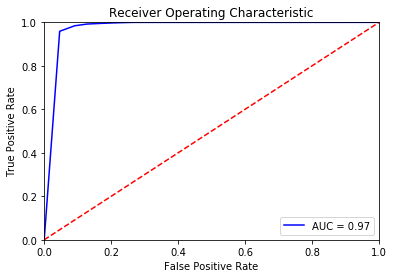

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1], pos_label=1)
auc_algo = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_algo)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
cv_score = cross_val_score(model_KNC,X_resampled,y_resampled,cv = 10, scoring = 'roc_auc')
print(cv_score)

[ 0.97538146  0.97436658  0.97560921  0.9758041   0.97542173  0.97838606
  0.97917936  0.97830156  0.97633203  0.97896839]


In [49]:
test_stage = test_stage[list(X_resampled.columns.values)]

In [50]:
model_KNC.fit(X_resampled, y_resampled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
           weights='uniform')

In [51]:
_pred = model_KNC.predict_proba(test_stage)

In [52]:
pred_reSample_KNC = pd.DataFrame(_pred[:,1],columns=['stroke'])

In [55]:
Prediction = pd.concat([test_pid,pred_reSample_KNC], axis=1 )
Prediction.to_csv('../Submissions/Submission1.csv',sep=',',index =False)

In [56]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=6,
 gamma=0.09,
 reg_alpha = 1,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [57]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0.09, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=6, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [58]:
cv_score = cross_val_score(xgb2,X_resampled,y_resampled,cv = 10, scoring = 'roc_auc')
print(cv_score)

[ 0.96476154  0.99999983  0.99998789  0.99999884  1.          0.99999967
  0.9999995   0.9999989   0.99999884  0.99999994]


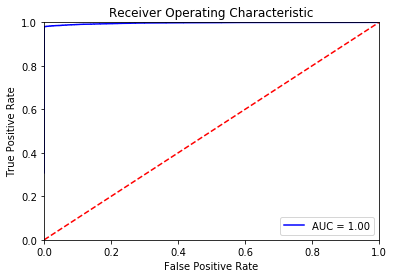

In [59]:
y_predict = xgb2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1], pos_label=1)
auc_algo = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_algo)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
xgb2.fit(X_resampled, y_resampled)

_pred = xgb2.predict_proba(test_stage)

pred_reSample_xgb2 = pd.DataFrame(_pred[:,1],columns=['stroke'])

Prediction = pd.concat([test_pid,pred_reSample_xgb2], axis=1 )
Prediction.to_csv('../Submissions/Submission2.csv',sep=',',index =False)